 ###  <center>Waves' blockchain analytics of tokens.</center>  
 
 Blockchain provide an excellent data for various kinds of analytics. Hereby is a review of the tokens (an assets) generated on the  <a href="https://wavesplatform.com">Waves</a> platform by some of their characteristics.The results are presented graphically with following explanations. <br> 
Text information about Waves tokens can be found <a href="http://dev.pywaves.org/assets/">here </a> and formed by the Waves itself.
 
**The logic behind processing and data analytics:**
1. Data for analytics are generated by parsing of the Waves blockchain addressing public node nodes.wavesplatform.com . Data is recorded to .json.
2. Pulling data out of .josn and making necessary conversions. 
3. Plotting the charts and commenting base on the generated data.<br>
 
**Used technologies**:
 + programming language: Python.
 + development environment: <a href="https://jupyter.org/">Jupyter</a>.
 + charts plotting: <a href="https://matplotlib.org/"> Matplotlib</a>.
 + <a href="http://nodes.wavesplatform.com/api-docs/index.html">Waves Full Node API</a>.
 + code from <a href="https://github.com/PyWaves/pywavestools">PyWaves</a>(MIT license) repository for blockchain parsing.
 
**Technical explanations**:
+ Jupyter notebook contains only the code that is preparing and showing the data. Code for blockchain parsing rendered to the separate .py files.
+ If you want an up-to-date data analytics you need to re-parse blockchain and restart the Jupyter notebook cells.
+ You can find the project on <a href="https://github.com/Ivanco21/Waves-assets-analytics">GitHub</a>.

**Necessary notifications**:
+ **Skip the code if you are interested only in the results!**
+ This article is not the answer to the questions like “When Waves moon?” 
+ Here you can find only analytics of the data. Conclusions are at your discretion. 

**Few words about Waves tokens**:
+ Every member of the main network can issue a token (an asset).
+ Waves tokens issuing (emulation) costs the current value of 1 Waves
+ Tokens issuing (emulation) is rather simple. All you need is to enter the necessary data through the GUI wallet and issue your token. 


===================================================================================================================<br>
Lets start!<br>The first chart shows the increase in the number of the tokens from the issuing of the first one until the moment when parsing was performed. 

In [1]:
import sys
temp = %pwd 
scriptsFolder = temp + '\scripts'
sys.path.append(scriptsFolder)
#sys.path

import os 
import json
import re
import time
import numpy as np
import requests
import jsonWorker as jw #help module for work with .json
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker

from datetime import datetime
from collections import Counter #sort array



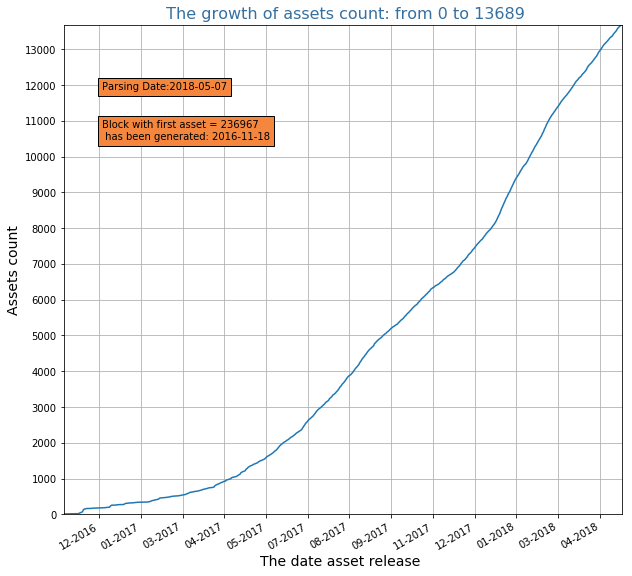

In [2]:
def formatCalendarDataAssetCount(information):
    dataProduse_countAssets = []
    assetCounter = 1
    infCount = 0

    for n in information:
        dataNotFormated = n['issue_time']
        tempData = datetime.strptime(dataNotFormated, "%m/%d/%Y %H:%M:%S")
        oneAssetData = datetime.date(tempData)

        if infCount > 0:
            previousDataNotFormated = information[infCount-1]['issue_time']
            previousTempData = datetime.strptime(previousDataNotFormated, "%m/%d/%Y %H:%M:%S")
            previousAssetData = datetime.date(previousTempData)
            #add one asset count to previos coint 
            if oneAssetData == previousAssetData:
                assetCounter += 1
                date_count = {
                        'date': previousAssetData,
                        'countAssets': assetCounter
                        }
                l = len(dataProduse_countAssets)
                dataProduse_countAssets.pop(l-1)
                dataProduse_countAssets.append(date_count)
                infCount += 1

            elif oneAssetData != previousAssetData:
                assetCounter += 1
                date_count = {
                        'date': oneAssetData,
                        'countAssets': assetCounter
                        }
                dataProduse_countAssets.append(date_count)
                infCount += 1
        #first asset     
        elif infCount == 0:
            date_count = {
                'date': oneAssetData,
                'countAssets': assetCounter
                 }
            dataProduse_countAssets.append(date_count)
            infCount += 1
            
    return dataProduse_countAssets

##########
information = jw.jsonRead(".\\parse_info\\assetsInfo.json")
information.reverse()            
dataProduse_countAssets = formatCalendarDataAssetCount(information)

allData = []
allCountInData = []
for i in dataProduse_countAssets:
    oneData = i['date']
    allData.append(oneData)
    oneCountInData = i['countAssets'] 
    allCountInData.append(oneCountInData)
#for interactive grafics
#%matplotlib notebook   
%matplotlib inline 

x = np.array(allData)
y = np.array(allCountInData)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot (1, 1, 1)

# X axis
datesToWrite = mdates.DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(datesToWrite)
locator_x = matplotlib.ticker.MaxNLocator(15)
ax.xaxis.set_major_locator(locator_x)
xMin = x[0]
xMax = x[len(x)-1]
ax.set_xlim([xMin,xMax])
# Y axis
locator_y = matplotlib.ticker.MultipleLocator(base=1000)
ax.yaxis.set_major_locator (locator_y)
yMax = y[len(y)-1]
ax.set_ylim(0,yMax)                                                     

plt.plot(x, y)
# Grafic comments 
maxAssetCount = str(y[len(y)-1] -1 )
plt.title(" The growth of assets count: from 0 to " + maxAssetCount, fontsize = 16,color = '#3670a0')
plt.xlabel('The date asset release ', fontsize = 14,color = 'black')
plt.ylabel('Assets count',fontsize = 14 ,color = 'black');
parsingData = str(x[len(x)-1])
dateCreatedFirstAset = str(x[0])
plt.text(x[20],y[len(y) - 50] , 'Parsing Date:' + parsingData, bbox={"facecolor": "#f4863e"})
plt.text(x[20],y[len(y) - 80] , 'Block with first asset = 236967\n has been generated: '
         + dateCreatedFirstAset, bbox={"facecolor": "#f4863e"})

fig.autofmt_xdate()
plt.grid(True)
plt.show()

===================================================================================================================<br>
Ok, we issued a token (an asset). How much tokens did you consider necessary to issue ? The results are presented on the charts below.<br>
As we can observe, the founders wants a lot of tokens.<br>
Interesting fact: 
 + Some issuers probably wanted a lot of tokens or was just testing Waves blockchain and so they got 9223372036854775807 tokens. This is the maximum value of datatype-Long64 used in Scala (Waves Node written in Scala).<br> For example: :http://dev.pywaves.org/assets/E1mrEVjwmBL9RbhvjwjWzr3cT2gcBNckSFpygZbZ1vNZ 

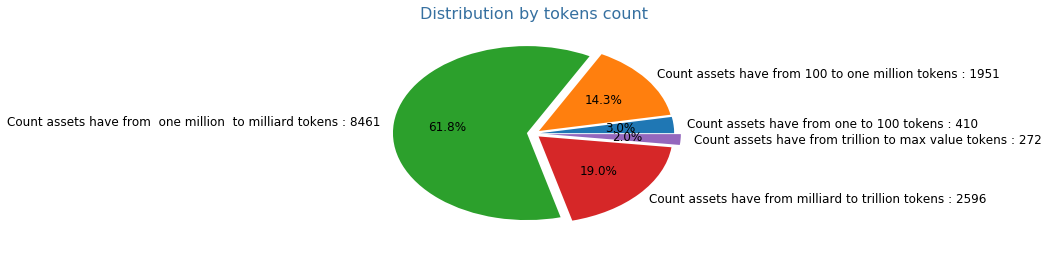

Some valiue:
1.Count assets have one token: 159
2.Count assets have max amount tokens: 6


In [3]:
%matplotlib inline

assetsINFO = jw.jsonRead('.\\parse_info\\assetsInfo.json')
assetsINFO.reverse()
allAssetsQuantity = jw.getOneTag(assetsINFO,'qt')#get Quantity tokens
allAssetsDecimals = jw.getOneTag(assetsINFO,'dec')#get Decimals tokens

astTokenBalance = []

#node REST API return not formated count tokens.Use token decimal for formating Quantity
for k,n in enumerate(allAssetsQuantity):
    tmp = n/10. ** allAssetsDecimals[k]
    astTokenBalance.append(tmp)

ast = np.array(astTokenBalance)
assetsSorted = np.sort(ast)
idx100 = np.nonzero(assetsSorted == 100)[0][0]
idx1000000 = np.nonzero(assetsSorted == 1000000)[0][0]
idx1000000000 = np.nonzero(assetsSorted == 1000000000)[0][0]
idx1000000000000 = np.nonzero(assetsSorted == 1000000000000)[0][0]

value = []
value.append(idx100)

cnt1000000_to_100 = idx1000000 - idx100 
value.append(cnt1000000_to_100)

cnt1000000000_to_1000000 = idx1000000000 - idx1000000
value.append(cnt1000000000_to_1000000)

cnt1000000000000_to_1000000000 = idx1000000000000 - idx1000000000
value.append(cnt1000000000000_to_1000000000)

cnt_End_to_1000000000000 = len(assetsSorted) - idx1000000000000
value.append(cnt_End_to_1000000000000)

labels = ('Count assets have from one to 100 tokens : ' + str(idx100),
          'Count assets have from 100 to one million tokens : ' + str(cnt1000000_to_100),
          'Count assets have from  one million  to milliard tokens : ' + str(cnt1000000000_to_1000000),
          'Count assets have from milliard to trillion tokens : ' + str(cnt1000000000000_to_1000000000),
          'Count assets have from trillion to max value tokens : ' + str(cnt_End_to_1000000000000)) 
          
explode = (0.05, 0.05, 0.05,0.05,0.1)
textprops = {'fontsize':12}
plt.title('Distribution by tokens count',fontsize = 16,color = '#3670a0')
plt.pie(value, labels=labels, autopct='%1.1f%%', shadow = False, explode = explode,radius = 1,textprops=textprops )
plt.show()

cntOneToken = len(np.nonzero(assetsSorted == 1)[0])
cntMaxValue = len(np.nonzero(assetsSorted == 9223372036854775807)[0])
print("Some valiue:")
print("1.Count assets have one token: " + str(cntOneToken))
print("2.Count assets have max amount tokens: " + str(cntMaxValue))

===================================================================================================================<br>
The next interesting characteristic of token is an opportunity to reissue it. Two options are possible:
+ Reissuable = True: the owner can change the number of tokens later
+ Reissuable = False: the owner can not change the number of tokens later

The choice was distributed almost equally:

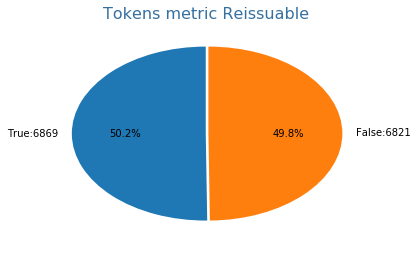

In [4]:
%matplotlib inline

assetsINFO = jw.jsonRead('.\\parse_info\\assetsInfo.json')
allAssetsReissuable = jw.getOneTag(assetsINFO,'reissuable')#get reissuable
trueCount = allAssetsReissuable.count(True)
falseCount = allAssetsReissuable.count(False)

value = []
value.append(trueCount)
value.append(falseCount)

labels = 'True:' + str(trueCount), 'False:' + str(falseCount)
explode = (0, 0.02)
plt.title('Tokens metric Reissuable',fontsize = 16,color = '#3670a0')
plt.pie(value, labels=labels, autopct='%1.1f%%', shadow = False, explode = explode,radius = 1,startangle=90)

plt.show()

===================================================================================================================<br>
For each token, there is an option of text description where the links and URLs can be added.<br>
The chart below shows us if this option has been used by the issuers of analyzed tokens: 

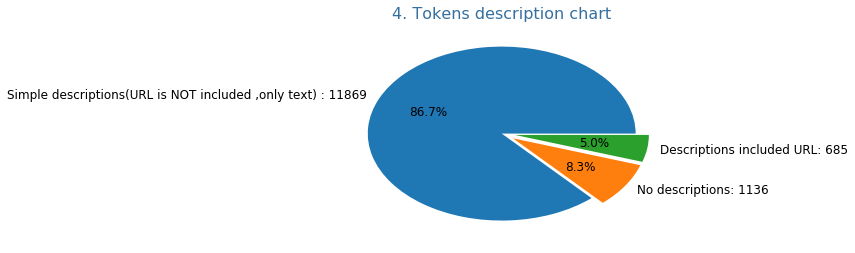

Just for fun\out of curiosity:
1.The word 'Bitcoin' occurs in descriptions: 532
2.The word 'Ethereum' word occurs in descriptions: 95
3.The word 'Moon' word occurs in descriptions: 65


In [9]:
%matplotlib inline

assetsINFO = jw.jsonRead('.\\parse_info\\assetsInfo.json')
allAssetsDescriptions = jw.getOneTag(assetsINFO,'description')#get description

notNullDescriptions = []
notNullDescriptions = list(filter(None, allAssetsDescriptions))
countNullDescriptions = len(allAssetsDescriptions) - len(notNullDescriptions)

countHTTPS_descriptions = 0
bitcoinWordCounter = 0
ethereumWordCounter = 0
moonWordCounter = 0
for i in notNullDescriptions:
    #simple search pattern
    # URL adress don't check "200" HTTP response status
    res = re.findall(r'(https?://\S+)', i)
    resBitcoin = re.findall('Bitcoin|bitcoin|BITCOIN', i)
    resEthereum = re.findall(r'Ethereum|ethereum|ETHEREUM', i)
    resMoon = re.findall(r'Moon|moon|MOON', i)
    if len(res) > 0:
        countHTTPS_descriptions += 1
    if len(resBitcoin) > 0:
        bitcoinWordCounter += len(resBitcoin)
    if len(resEthereum) > 0:
        ethereumWordCounter += len(resEthereum)
    if len(resMoon) > 0:
        moonWordCounter += len(resMoon)
        
        
        
value = []
notNullnotUrlDescriptions = len(allAssetsDescriptions) - countNullDescriptions - countHTTPS_descriptions
value.append(notNullnotUrlDescriptions) 
value.append(countNullDescriptions)
value.append(countHTTPS_descriptions)

labels = ('Simple descriptions(URL is NOT included ,only text) : ' + str(notNullnotUrlDescriptions),
          'No descriptions: ' + str(countNullDescriptions),
          'Descriptions included URL: ' + str(countHTTPS_descriptions)) 
          
explode = (0, 0.1, 0.1)
textprops = {'fontsize':12}
plt.title('4. Tokens description chart',fontsize = 16,color = '#3670a0')
plt.pie(value, labels=labels, autopct='%1.1f%%', shadow = False, explode = explode,radius = 1,textprops=textprops )
plt.show()


print("Just for fun\out of curiosity:")
print("1.The word 'Bitcoin' occurs in descriptions: " + str(bitcoinWordCounter))
print("2.The word 'Ethereum' word occurs in descriptions: " + str(ethereumWordCounter))
print("3.The word 'Moon' word occurs in descriptions: " + str(moonWordCounter))

===================================================================================================================<br>
Lets proceed to Issuers (those who issued a token). One issuer can issue an unlimited number of tokens. The chart below presents who much assets was generated by one issuer.

In [10]:
assetsINFO = jw.jsonRead('.\\parse_info\\assetsInfo.json')
allAssetsIssuers = jw.getOneTag(assetsINFO,'issuer')#get issuer

# issuer - how tokens creared issuer
issuer_count = Counter()
for issuer  in allAssetsIssuers:
    issuer_count[issuer] += 1
    
# count tokens - how many peoples created this count tokens   
cntTokens_countIssuers = Counter()    
for value in issuer_count.values():
    cntTokens_countIssuers[value] += 1

#converted to list
tempDictList = []
for key, value in cntTokens_countIssuers.items():
    tempDictList.append([key, value])
    
def getKey(item):
    return item[0]

# count tokens - how many peoples created this count tokens   
tokenPeople = sorted(tempDictList,key=getKey)  
   
from IPython.display import HTML, display

display(HTML(
    '<table><tr><caption><font size="4" color="#3670a0" face="Arial">Token issuers</font></caption>'
    '<tr><th>How many tokens created one issuer</th><th>Count issuer</th></tr>{}</tr></table>'.format(
        '</tr><tr>'.join('<td style="text-align:center">{}</td>'.format(
            '</td><td style="text-align:center">'.join(str(_) for _ in row)) for row in tokenPeople)
        )
 ))

===================================================================================================================<br>
The next interesting metrics is how much issued tokens are on the account of the issuer in percentage from the all amount of tokens. In Waves terminology, this metrics called Circulating.
However we also should consider the fact that the number of the tokens here are primary. And as we know tokens are “reissuble” and some token's ratio of primary issued tokens to token's holders at the moment are greater than 100%. It means that holders can change the amount of tokens through the time of their exploitation. Lets see how it looks graphically: 

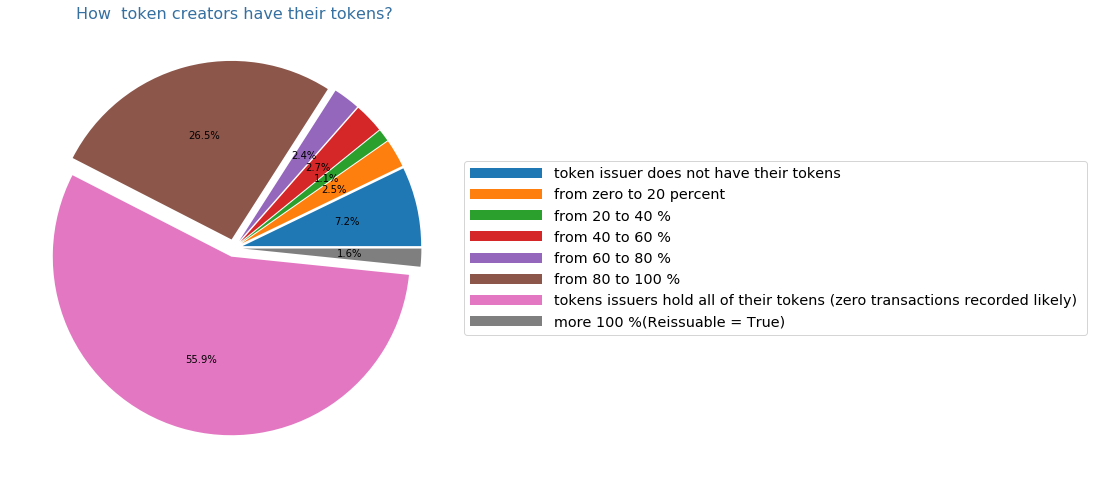

Total: 98.374.
Percent is loss: 1.626 - is lossing by convert and accuracy numbers in python.


In [11]:
%matplotlib inline

#node REST API return not formated count tokens.Use token decimal for formating Quantity
def decimalsConvertValue(value,decimals):
    convertedValues = []
    for k,n in enumerate(value):
        tmp = n/10. ** decimals[k]
        convertedValues.append(tmp)
    return convertedValues

balancesINFO = jw.jsonRead('.\\parse_info\\ownerBalanses.json')
assetsINFO = jw.jsonRead('.\\parse_info\\assetsInfo.json')
assetsINFO.reverse()

allOwnerBalances = jw.getOneTag(balancesINFO,'balance')#get balance
allAssetsDecimals = jw.getOneTag(assetsINFO,'dec')#get Decimals tokens
allQuantity = jw.getOneTag(assetsINFO,'qt')#get qt

ownBlns = decimalsConvertValue(allOwnerBalances,allAssetsDecimals)
quantity = decimalsConvertValue(allQuantity,allAssetsDecimals)

percent = []
#percent quantity tokens and  how tokens have issuer 
for nt,k in enumerate(ownBlns):
    # this method gives an error in the calculations
    tmpStr = format((k*100)/quantity[nt], '.3f')
    tmp = float(tmpStr)
    percent.append(tmp)
      
idx_0= [X for X in list(percent) if (X == 0)]
idx0_20 = [X for X in list(percent) if (X > 0 and X <= 20)]
idx20_40 = [X for X in list(percent) if (X > 20 and X <= 40)]
idx40_60 = [X for X in list(percent) if (X > 40 and X <= 60)]
idx60_80 = [X for X in list(percent) if (X > 60 and X <= 80)]
idx80_100 = [X for X in list(percent) if (X > 80 and X < 100)]
idx_100 = [X for X in list(percent) if (X == 100)]
idx_over_100 = [X for X in list(percent) if (X > 100)]#if token was increased

prcnt_0 = (len(idx_0*100))/len(percent)
prcnt0_20 = (len(idx0_20)*100)/len(percent)
prcnt20_40 = (len(idx20_40)*100)/len(percent)
prcnt40_60 = (len(idx40_60)*100)/len(percent)
prcnt60_80 = (len(idx60_80)*100)/len(percent)
prcnt80_100 = (len(idx80_100)*100)/len(percent)
prcnt_100 = (len(idx_100*100))/len(percent)
prcnt_over_100 = (len(idx_over_100*100))/len(percent)

fig, ax = plt.subplots(figsize=(8,12), subplot_kw=dict(aspect="equal"))
value = []
value.append(prcnt_0)
value.append(prcnt0_20)
value.append(prcnt20_40)
value.append(prcnt40_60)
value.append(prcnt60_80)
value.append(prcnt80_100)
value.append(prcnt_100)
value.append(prcnt_over_100)

comments = ['token issuer does not have their tokens',
            'from zero to 20 percent','from 20 to 40 %',
            'from 40 to 60 %','from 60 to 80 %',
            'from 80 to 100 %',
            'tokens issuers hold all of their tokens (zero transactions recorded likely) ',
            'more 100 %(Reissuable = True)']

explode = (0.05, 0.05, 0.05,0.05, 0.05, 0.05,0.05,0.05)
plt.title('How  token creators have their tokens?',fontsize = 16,color = '#3670a0')
wedges, texts, autotexts = ax.pie(value, autopct='%1.1f%%',textprops=dict(color="black"),explode = explode)
ax.legend(wedges, comments,
          title= '',
          loc='center left',
          bbox_to_anchor=(1, 0, 1, 1),
          handlelength = 5,
          fontsize = 'x-large')

plt.show()
allpercent = format(prcnt_0+prcnt0_20+prcnt20_40+prcnt40_60+prcnt60_80+prcnt80_100+prcnt_100, '.3f')
messange = 'Total: ' + allpercent + '.'
lossPercent = format(100 - (prcnt_0+prcnt0_20+prcnt20_40+prcnt40_60+prcnt60_80+prcnt80_100+prcnt_100), '.3f')
messange2 = 'Percent is loss: ' + lossPercent +' - is lossing by convert and accuracy numbers in python.' 
print(messange)
print(messange2)

We examined most interesting characteristics of tokens except one. Any economy is viable due to its circulation. Despite the fact that there is Circulating (look up the token on http://dev.pywaves.org/assets/) it doesn't display the number of transactions for each token and present us only the status of token at the moment. To calculate the number of transactions for each token, we need to parse all the blockchain transactions from the moment of token's issue.<br>
Particularly, it is the number of transactions one token have been processed through that is the most revealing indicator of tokens economy.  And it's important to pay attention to the fact, that it is a transactions not only from the issuer of a token.<br> 
However calculation and analytics of that data require more of my time, efforts and most probably the raise of my own node.<br> 

P.S. 
Thanks are welcomed at Waves wallet -- **3PLG1KdKy7BGT5Y4JP65HJh7xd1ZVz3F4Qp**<br>
If it collects 100 Waves, I would be able to continue my work on the Waves blockchain analytics (I have a couple of more ideas), 25% is going to a translator (RUS to ENG), and from 15% I am willing to thank the authors of the most useful and interesting comments. 
In case it won't raise 100 Waves, I take it as a lack of demand on such analytics from the Waves community and most probably will do something else interesting.

Your comments and feedback about next topics are welcome: 
+ code improvement
+ charts plotting improvement
+ ideas/suggestions for analytics of Waves or other blockchain platforms

Wishes,<br>keep in touch at  - **ivansl.public@gmail.com**